In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Load dataset
diab = pd.read_csv(r"C:\zubeda\PGA02_Zubu\Machine Learning Models\LogisticRegression\diabetes.csv")

In [3]:
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Split dataset into features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
X = diab[feature_cols]   #Features
y = diab.Outcome   #Target variable

In [5]:
#Split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#random_state is the object that controls randomization during splitting

In [6]:
#import the class
from sklearn.linear_model import LogisticRegression

#instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs', max_iter=400)

#solver='lbgfs' - Algorithm to use in the optimization problem (Classify)
#max_iter=400 - Maximum number of iterations taken for the solvers to converge (Conclude Num of times entity falls undet a particular class)

#fit the model with data
logreg.fit(X_train, y_train)  #Training model

y_pred = logreg.predict(X_test)  #Predicting/Testing

In [7]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) #Predicted against Actual
cnf_matrix

array([[118,  12],
       [ 26,  36]], dtype=int64)

Text(33.0, 0.5, 'Actual label')

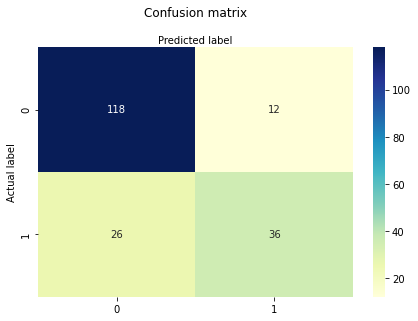

In [8]:
class_names = [0, 1] #name of classes

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
#The arange() function is used to get evenly spaced values within given interval
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
#heatmap() fmt parameter – add text on each cell. The annot only help to add numeric value on python
#heatmap cell but fmt parameter allows to add string (text) values on the cell.
#'g' General format

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.xlabel("Predicted label")
plt.ylabel("Actual label")

In [9]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.8020833333333334
Precision: 0.75
Recall: 0.5806451612903226


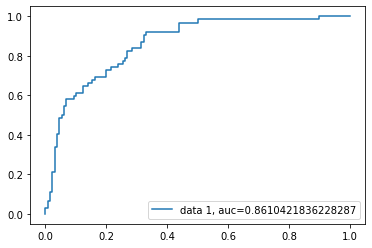

In [10]:
y_pred_proba = logreg.predict_proba(X_test)[::, 1]
#The function predict_proba() returns a numpy array of two columns. The first column is the probability
#that target=0 and the second column is the probability that target=1 . That is why we add [:,1] after
#predict_proba() in order to get the probabilities of target=1 .

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)  #False positive rate, True positive rate
auc = metrics.roc_auc_score(y_test, y_pred_proba)  #Area under curve
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
#The TPR defines how many correct positive results occur among all positive samples available during
#the test
#FPR, on the other hand, defines how many incorrect positive results occur among all negative samples
#available during the test
#Threshold corresponds to a point on the ROC curve that is colinear with adjacent points